# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Input Nama]
- **Email:** [Input Email]
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penyewaan sepeda berdasarkan musim selama dua tahun terakhir? Apakah terjadi peningkatan atau penurunan dari tahun sebelumnya?
- Bagaimana distribusi pengguna sepeda registered dan pengguna sewa casual setiap musimnya?
- Bagaimana pola penggunaan sepeda sehari-hari? Apakah adanya hari libur berdampak besar terhadap tingkat penggunaan sepeda?
- Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan jam?
- Apakah faktor-faktor lain, seperti temperatur dan kelembapan berpengaruh terhadap jumlah pengguna sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('data/hour.csv')
df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

### Assessing Data

#### Menilai tabel `df`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
print("Jml Data Terduplikasi : ", df.duplicated().sum())

Jml Data Terduplikasi :  0


In [6]:
df.describe(include="all")

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

### Cleaning Data

#### Menghapus Kolom Yang Tidak Digunakan

In [7]:
df = df.drop(columns=['instant', 'windspeed'])

#### Memperbaiki Type Data Kolom `dteday`

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 2.0 MB


#### Missing Values 

In [9]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
casual        0
registered    0
cnt           0
dtype: int64

#### Mendefinisikan Tiap Label

In [10]:
# mengubah type data kolom label ke bentuk category
df['season'] = df.season.astype('category')
df['yr'] = df.yr.astype('category')
df['mnth'] = df.mnth.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')

In [11]:
# kolom season
df['season'] = df['season'].map({
    1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

# kolom yr (YEAR)
df ['yr'] = df['yr'].map({
    0 : 2011 , 1 : 2012
})

# kolom mnth (MONTH)
df['mnth'] = df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

# kolom weekday
df['weekday'] = df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

# kolom weathersit
df['weathersit'] = df['weathersit'].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

df.sample(5)

dteday    season    yr mnth  hr  holiday weekday  workingday  \
16715 2012-12-04    Winter  2012  Dec   6        0     Tue           1   
10249 2012-03-08  Springer  2012  Mar   3        0     Thu           1   
4349  2011-07-05      Fall  2011  Jul   3        0     Tue           1   
473   2011-01-21  Springer  2011  Jan  18        0     Fri           1   
1803  2011-03-20  Springer  2011  Mar  20        0     Sun           0   

         weathersit  temp   atemp   hum  casual  registered  cnt  
16715  Misty/Cloudy  0.36  0.3788  0.93       3         150  153  
10249         Clear  0.46  0.4545  0.63       0           3    3  
4349          Clear  0.66  0.6212  0.74       1           7    8  
473           Clear  0.12  0.1212  0.30       1         119  120  
1803          Clear  0.36  0.3333  0.46      21          46   67

## Exploratory Data Analysis (EDA)

### Explore `Dataframe`

In [17]:
df.sample(5)

dteday    season    yr mnth  hr  holiday weekday  workingday  \
6625  2011-10-08    Winter  2011  Oct  15        0     Sat           0   
849   2011-02-07  Springer  2011  Feb  20        0     Mon           1   
6757  2011-10-14    Winter  2011  Oct   3        0     Fri           1   
11165 2012-04-15    Summer  2012  Apr  10        0     Sun           0   
15735 2012-10-22    Winter  2012  Oct  20        0     Mon           1   

         weathersit  temp   atemp   hum  casual  registered  cnt  
6625          Clear  0.66  0.6212  0.39     262         234  496  
849    Misty/Cloudy  0.32  0.3333  0.70       6          82   88  
6757          Clear  0.56  0.5303  0.94       1           6    7  
11165         Clear  0.58  0.5455  0.53     186         235  421  
15735         Clear  0.50  0.4848  0.59      21         382  403

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  category      
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  category      
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  cnt         17379 non-null  int64         
dtypes: category(5), datetime64[ns](1), float64(3), int64(6)
memory usage: 

In [52]:
# data pengguna sepeda tahun 2011 dan 2012

df.groupby(by='yr').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                         
      max min        mean      sum
yr                                
2011  651   1  143.794448  1243103
2012  977   1  234.666361  2049576

In [29]:
# data pengguna sepeda setiap musimnya

df.groupby(by="season").agg({
    "cnt" : ['max', 'min', 'mean','sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                          registered  casual
          max min        mean      sum        sum     sum
season                                                   
Springer  801   1  111.114569   471348     410726   60622
Summer    957   1  208.344069   918589     715067  203522
Fall      977   1  236.016237  1061129     835038  226091
Winter    967   1  198.868856   841613     711831  129782

In [32]:
# data pengguna setiap bulan

df.groupby(by=["yr","mnth"]).agg({
    "cnt" : ['max', 'min', 'mean','sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                         registered casual
           max min        mean     sum        sum    sum
yr   mnth                                               
2011 Jan   249   1   55.507267   38189      35116   3073
     Feb   327   1   74.291217   48215      41973   6242
     Mar   336   1   87.732877   64045      51219  12826
     Apr   530   1  131.947149   94870      72524  22346
     May   611   1  182.555108  135821     104771  31050
     Jun   638   1  199.322222  143512     112900  30612
     Jul   596   1  189.974462  141341     104889  36452
     Aug   651   1  186.991792  136691     107849  28842
     Sep   628   1  177.709902  127418     100873  26545
     Oct   625   1  166.232840  123511      98289  25222
     Nov   553   1  142.095967  102167      86573  15594
     Dec   477   1  117.844804   87323      78875   8448
2012 Jan   559   1  130.558704   96744      87775   8969
     Feb   610   1  149.041908  103137      94416   8721
     Mar   957   1  221.904441  164875     133257  31618
     Apr   822   1  242.651811  174224     135768  38456
     May   873   1  263.259409  195865     151630  44235
     Jun   900   4  281.708333  202830     159536  43294
     Jul   913   2  273.665323  203607     161902  41705
     Aug   941   3  288.310484  214503     171306  43197
     Sep   977   3  303.573611  218573     174795  43778
     Oct   963   1  280.848870  198841     164303  34538
     Nov   729   1  212.623955  152664     131655  21009
     Dec   759   1  166.729111  123713     110468  13245

In [33]:
# data pengguna berdasarkan cuaca

df.groupby(by='weathersit').agg({
    "cnt": ['max', 'min', 'mean', 'sum'],
    "registered" : "sum",
    "casual" : "sum"
})

cnt                          registered  casual
                 max min        mean      sum        sum     sum
weathersit                                                      
Clear            977   1  204.869272  2338173    1875428  462745
Misty/Cloudy     957   1  175.165493   795952     661471  134481
Light Snow/Rain  891   1  111.579281   158331     135548   22783
Severe Weather   164  23   74.333333      223        215       8

In [136]:
# data pengguna setiap hari

df.groupby(by='weekday').agg({
    "cnt": ['max', 'min', 'mean']
})

cnt                
         max min        mean
weekday                     
Sun      776   1  177.468825
Mon      968   1  183.744655
Tue      970   1  191.238891
Wed      977   1  191.130505
Thu      976   1  196.436665
Fri      957   1  196.135907
Sat      783   1  190.209793

In [61]:
# data pengguna berdasarkan jam

df.groupby(by='hr').agg({
    'cnt' : ['max', 'min', 'mean', 'sum'], 
    "registered" : "sum",
    "casual" : "sum"
})

cnt                         registered casual
    max min        mean     sum        sum    sum
hr                                               
0   283   2   53.898072   39130      31755   7375
1   168   1   33.375691   24164      19455   4709
2   132   1   22.869930   16352      12940   3412
3    79   1   11.727403    8174       6281   1893
4    28   1    6.352941    4428       3554    874
5    66   1   19.889819   14261      13249   1012
6   213   1   76.044138   55132      52115   3017
7   596   1  212.064649  154171     146134   8037
8   839   5  359.011004  261001     245240  15761
9   426  14  219.309491  159438     136980  22458
10  539   8  173.668501  126257      92468  33789
11  663  10  208.143054  151320     108034  43286
12  776   3  253.315934  184414     134696  49718
13  760  11  253.661180  184919     132206  52713
14  750  12  240.949246  175652     120563  55089
15  750   7  251.233196  183149     128543  54606
16  783  11  311.983562  227748     173914  53834
17  976  15  461.452055  336860     282640  54220
18  977  23  425.510989  309772     265276  44496
19  743  11  311.523352  226789     191284  35505
20  567  11  226.030220  164550     138172  26378
21  584   6  172.314560  125445     104875  20570
22  502   9  131.335165   95612      79412  16200
23  256   2   87.831044   63941      52876  11065

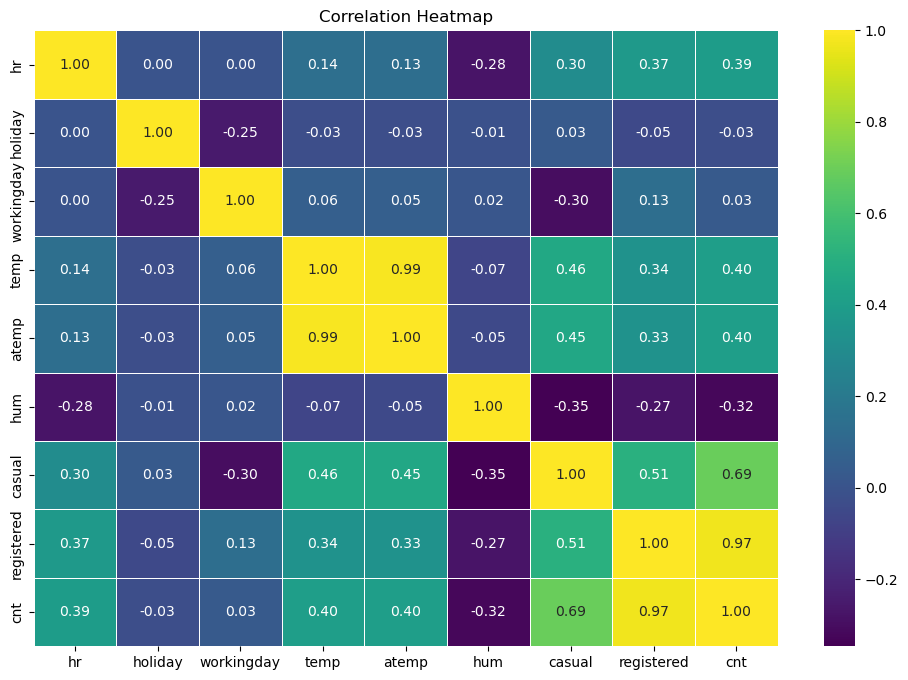

In [64]:
# korelasi heatmap
matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Visualization & Explanatory Analysis

### Bagaimana tren total penyewaan sepeda berdasarkan musim selama dua tahun terakhir? Apakah terjadi peningkatan atau penurunan dari tahun sebelumnya?

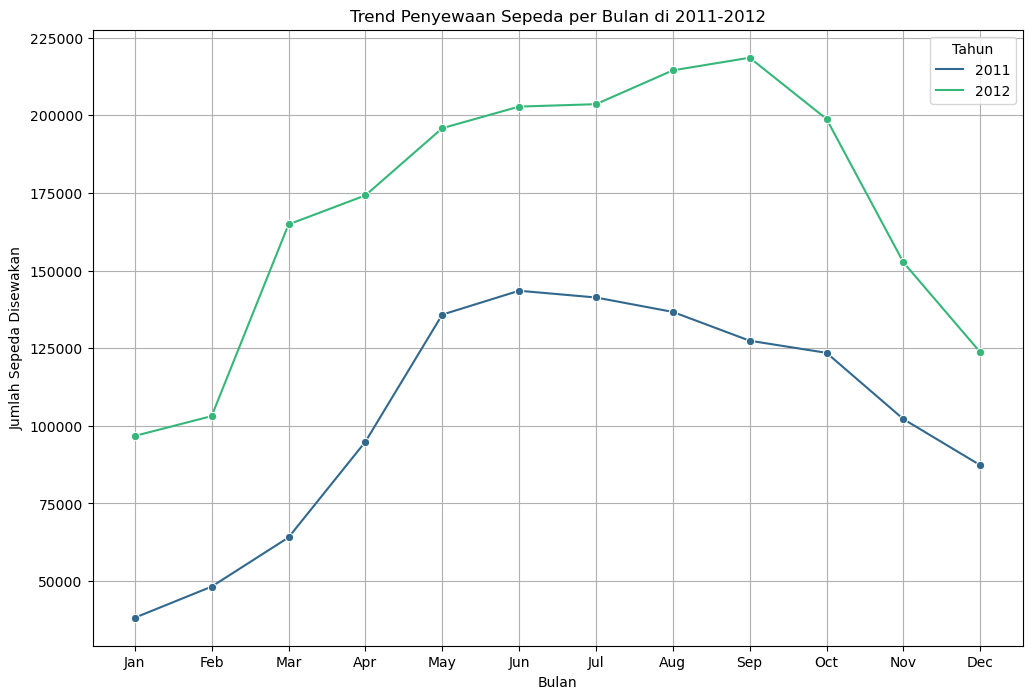

In [120]:
# mengelompokkan data tiap bulan
data_perbulan = df.groupby(by=['mnth','yr']).agg({
    'cnt' : 'sum'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=data_perbulan, 
             x='mnth', 
             y='cnt', 
             hue='yr', 
             palette="viridis",
             marker="o")
plt.title('Trend Penyewaan Sepeda per Bulan di 2011-2012')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sepeda Disewakan')
plt.grid(True)
plt.legend(title='Tahun')
plt.show()

### Bagaimana distribusi pengguna sepeda registered dan pengguna sewa casual setiap musimnya?

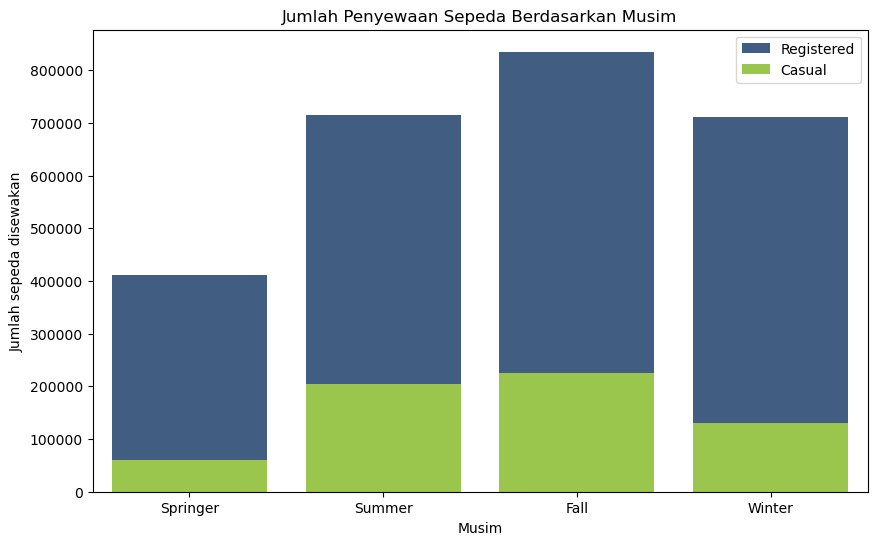

In [100]:
# mengelompokkan data musim
data_musim = df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(12, 8))

sns.barplot(data=data_musim, x='season', y='registered', color=sns.color_palette("viridis")[1], label='Registered')
sns.barplot(data=data_musim, x='season', y='casual', color=sns.color_palette("viridis")[5], label='Casual')

plt.xlabel("Musim")
plt.ylabel("Jumlah sepeda disewakan")
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')
plt.legend()
plt.show()

### Bagaimana pola penggunaan sepeda sehari-hari? Apakah adanya hari libur berdampak besar terhadap tingkat penggunaan sepeda?

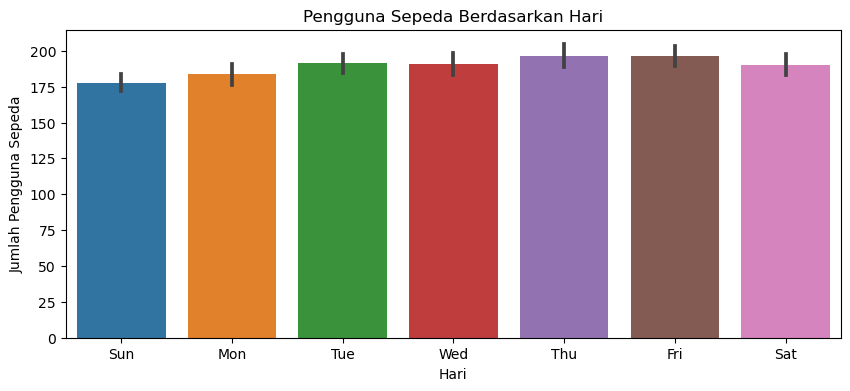

In [123]:
# pengguna sepeda berdasarkan hari

plt.figure(figsize=(10,4))

sns.barplot(
    data = df,
    x = 'weekday',
    y = 'cnt',
)
plt.title("Pengguna Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

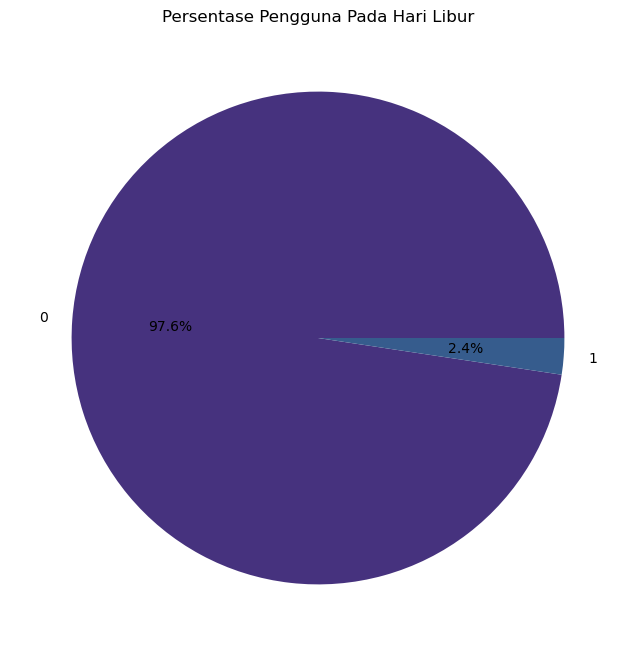

In [137]:
# pengguna sepeda di hari libur
data_harilibur = df.groupby(by='holiday')['cnt'].sum()

plt.figure(figsize=(8,8))
sns.set_palette("viridis")
plt.pie(
    x=data_harilibur,
    labels=df['holiday'].unique(),
    autopct='%1.1f%%'
)
plt.title("Persentase Pengguna Pada Hari Libur")
plt.show()

### Apakah ada pola tertentu dalam penyewaan sepeda berdasarkanÂ jam?

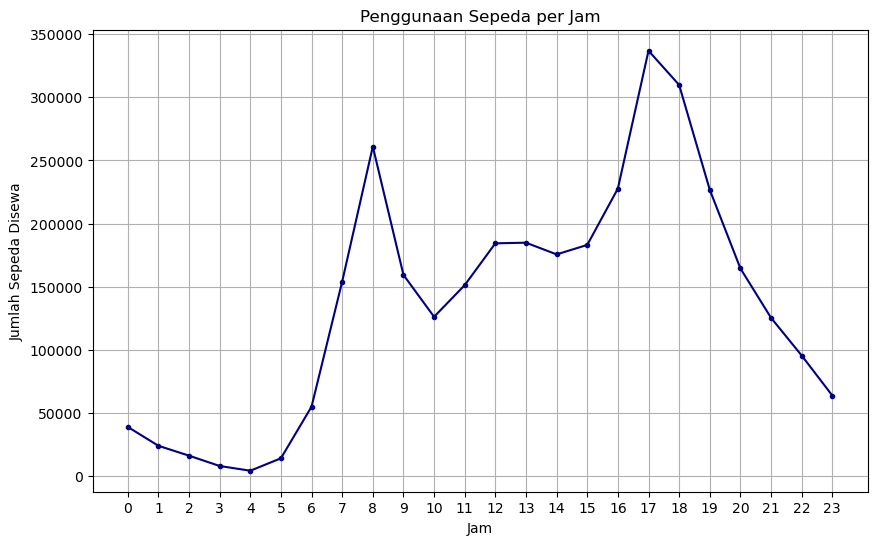

In [102]:
# mengelompokkan data per jam
data_perjam = df.groupby('hr')['cnt'].sum().reset_index()

# Memvisualisasikan penggunaan sepeda per jam
plt.figure(figsize=(12, 8))
plt.plot(data_perjam['hr'], data_perjam['cnt'], marker = ".", label='Count', color='navy')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda Disewa')
plt.title('Penggunaan Sepeda per Jam')
plt.xticks(range(24))
plt.grid(True)
plt.show()

### Apakah faktor-faktor lain, seperti temperatur dan kelembapan berpengaruh terhadap jumlah pengguna sepeda?

Text(0.5, 1.0, 'Pengaruh Kelembapan terhadap Pengguna Sepeda')

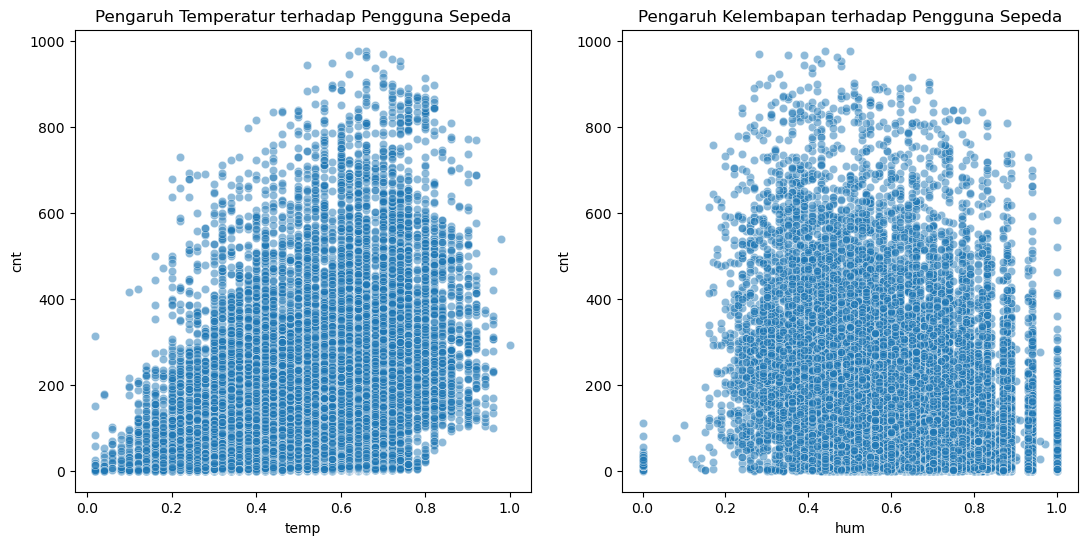

In [116]:
plt.figure(figsize=(20,6))

# Pengaruh Temperatur terhadap Pengguna Sepeda
plt.subplot(1,3,1)
sns.scatterplot(
    x='temp',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Pengaruh Temperatur terhadap Pengguna Sepeda')

# Pengaruh Kelembapan terhadap Pengguna Sepeda
plt.subplot(1,3,2)
sns.scatterplot(
    x='hum',
    y='cnt',
    data=df,
    alpha=0.5
)
plt.title('Pengaruh Kelembapan terhadap Pengguna Sepeda')

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2